In [17]:
import pandas as pd

# Cargar el conjunto de datos del Titanic
file_path = '/kaggle/input/titanic/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Ver las primeras filas del conjunto de datos
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Resumen estadístico del conjunto de datos
summary = titanic_data.describe(include='all')

# Resumen de valores faltantes por columna
missing_values = titanic_data.isnull().sum()

summary, missing_values


(        PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp       Parch  Ticke

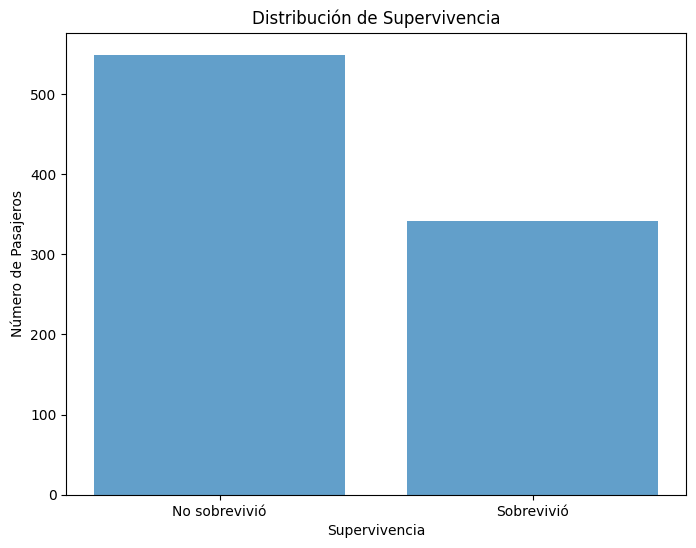

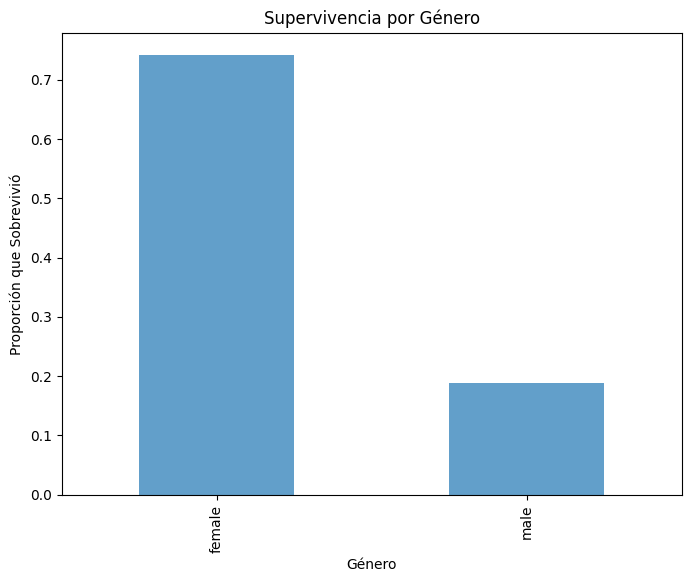

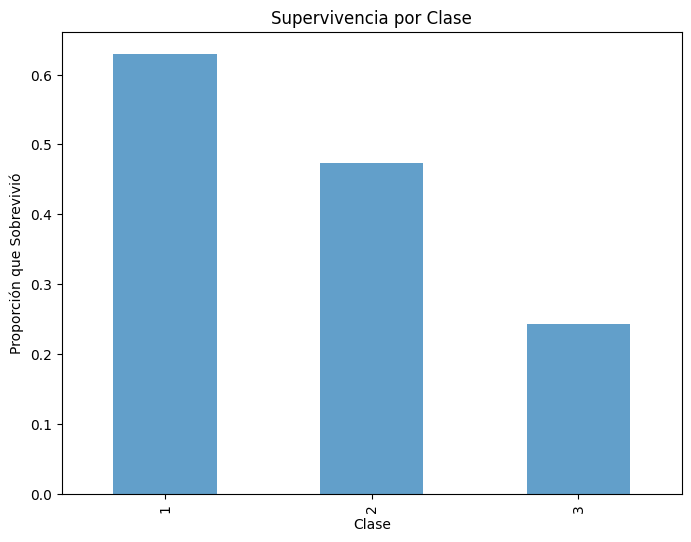

In [19]:
import matplotlib.pyplot as plt

# Distribución de sobrevivientes
survival_counts = titanic_data['Survived'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(['No sobrevivió', 'Sobrevivió'], survival_counts, alpha=0.7)
plt.title('Distribución de Supervivencia')
plt.ylabel('Número de Pasajeros')
plt.xlabel('Supervivencia')
plt.show()

# Relación entre género y supervivencia
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(8, 6))
survival_by_gender.plot(kind='bar', alpha=0.7)
plt.title('Supervivencia por Género')
plt.ylabel('Proporción que Sobrevivió')
plt.xlabel('Género')
plt.show()

# Relación entre clase y supervivencia
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8, 6))
survival_by_class.plot(kind='bar', alpha=0.7)
plt.title('Supervivencia por Clase')
plt.ylabel('Proporción que Sobrevivió')
plt.xlabel('Clase')
plt.show()


In [27]:
# Rellenar valores faltantes en 'Age' con la mediana de la columna
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Ya no es necesario rellenar valores para 'Embarked', ya que se ha transformado en variables dummy
# Por lo tanto, este paso puede eliminarse

# Eliminar columnas irrelevantes, si no se ha hecho previamente
# (Puedes verificar si ya se eliminaron antes de ejecutar esto)
titanic_data = titanic_data.drop(columns=['Cabin', 'Name', 'Ticket'], errors='ignore')

# Verificar nuevamente valores faltantes
remaining_missing_values = titanic_data.isnull().sum()
print(remaining_missing_values)


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [21]:
# Codificar variables categóricas
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})  # 0 = male, 1 = female
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)  # Crear variables dummy para 'Embarked'

# Variables seleccionadas para el modelo
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

# Dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = titanic_data[features]
y = titanic_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 8), (179, 8), (712,), (179,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix


('              precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85       110\n           1       0.79      0.67      0.72        69\n\n    accuracy                           0.80       179\n   macro avg       0.80      0.78      0.79       179\nweighted avg       0.80      0.80      0.80       179\n',
 array([[98, 12],
        [23, 46]]))

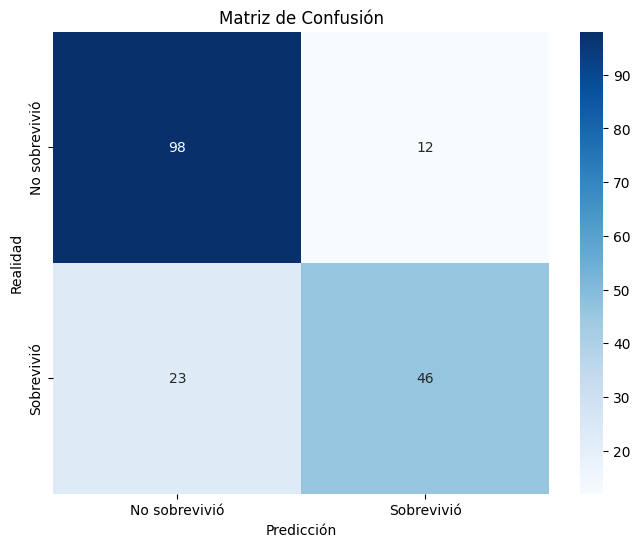

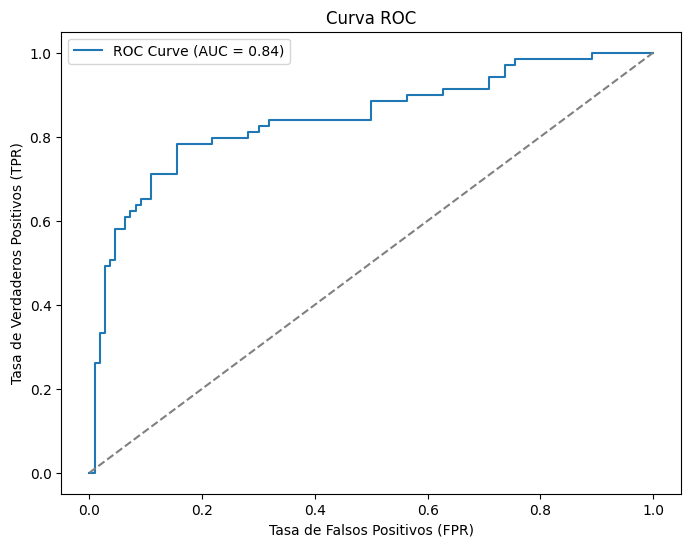

In [23]:
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], 
            yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

# Curva ROC y AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva (sobrevivió)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea de referencia
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.show()
